# Introduction
In this notebook I try to use the LCS appraoch to finding similar sounding predicate subject pairs in the ETCBC database.
I am following the insights provided here:

https://en.wikipedia.org/wiki/Longest_common_subsequence_problem

https://www.geeksforgeeks.org/longest-common-subsequence-dp-4/

# Prelude

In [64]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections, math, random, re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [66]:
A = use('bhsa', hoist=globals())

	connecting to online GitHub repo annotation/app-bhsa ... connected
Using TF-app in C:\Users\Oliver Glanz/text-fabric-data/annotation/app-bhsa/code:
	rv1.2=#5fdf1778d51d938bfe80b37b415e36618e50190c (latest release)
	connecting to online GitHub repo etcbc/bhsa ... connected
Using data in C:\Users\Oliver Glanz/text-fabric-data/etcbc/bhsa/tf/c:
	rv1.6=#bac4a9f5a2bbdede96ba6caea45e762fe88f88c5 (latest release)
	connecting to online GitHub repo etcbc/phono ... connected
Using data in C:\Users\Oliver Glanz/text-fabric-data/etcbc/phono/tf/c:
	r1.2 (latest release)
	connecting to online GitHub repo etcbc/parallels ... connected
Using data in C:\Users\Oliver Glanz/text-fabric-data/etcbc/parallels/tf/c:
	r1.2 (latest release)
   |     0.00s No structure info in otext, the structure part of the T-API cannot be used


Now, lets search for WayX clauses in Gen 20

# Longest Common Subsequence function as `LCS`
## Defining `LCS`
Here I am following to a great extent the code found here:

https://www.geeksforgeeks.org/longest-common-subsequence-dp-4/

and

https://www.geeksforgeeks.org/printing-longest-common-subsequence/


Its python2 based font and needs a quick fix (`xrange` => `range`).

In [67]:
# Dynamic programming implementation of LCS problem 
  
# Returns length of LCS for X[0..m-1], Y[0..n-1]  
def lcs(X, Y, m, n): 
    L = [[0 for x in range(n+1)] for x in range(m+1)] 
  
    # Following steps build L[m+1][n+1] in bottom up fashion. Note 
    # that L[i][j] contains length of LCS of X[0..i-1] and Y[0..j-1]  
    for i in range(m+1): 
        for j in range(n+1): 
            if i == 0 or j == 0: 
                L[i][j] = 0
            elif X[i-1] == Y[j-1]: 
                L[i][j] = L[i-1][j-1] + 1
            else: 
                L[i][j] = max(L[i-1][j], L[i][j-1]) 
  
    # Following code is used to print LCS 
    index = L[m][n] 
  
    # Create a character array to store the lcs string 
    lcs = [""] * (index+1) 
    lcs[index] = "" 
  
    # Start from the right-most-bottom-most corner and 
    # one by one store characters in lcs[] 
    i = m 
    j = n 
    while i > 0 and j > 0: 
  
        # If current character in X[] and Y are same, then 
        # current character is part of LCS 
        if X[i-1] == Y[j-1]: 
            lcs[index-1] = X[i-1] 
            i-=1
            j-=1
            index-=1
  
        # If not same, then find the larger of two and 
        # go in the direction of larger value 
        elif L[i-1][j] > L[i][j-1]: 
            i-=1
        else: 
            j-=1
    # Now we want to print the results
    print("LCS of " + X + " and " + Y + " is " + "".join(lcs))

## Testing LCS
### Simple Test with Latin characters

In [68]:
# Driver program 
X = "AGGTAB"
Y = "GXTXAYB"
m = len(X) 
n = len(Y) 
lcs(X, Y, m, n) 

LCS of AGGTAB and GXTXAYB is GTAB


### Simple Test with Hebrew characters form Isa 53:11
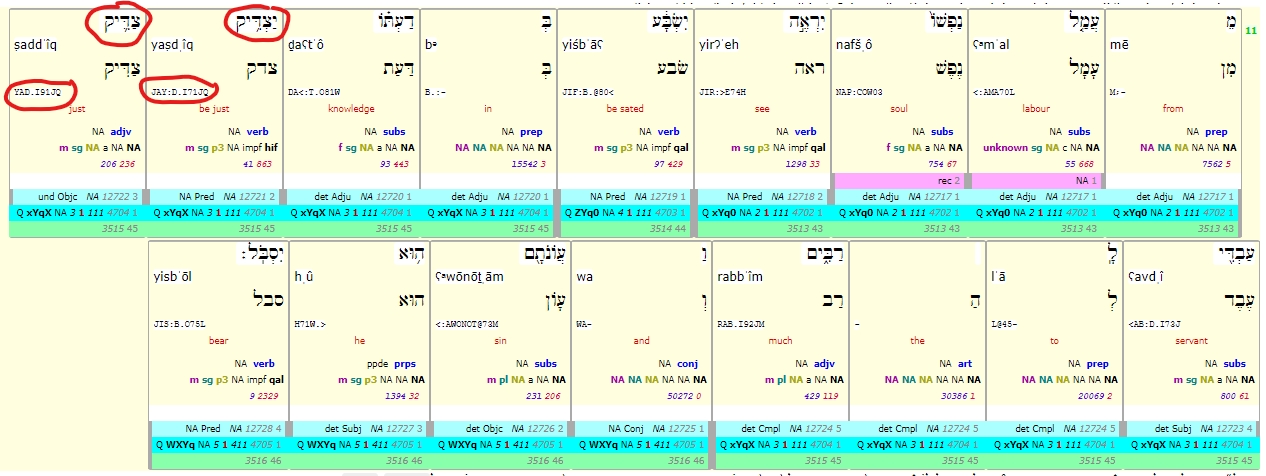


In [69]:
# Driver program 
X = "יַצְדִּ֥יק"
Y = "צַדִּ֛יק"
m = len(X) 
n = len(Y) 
lcs(X, Y, m, n) 

LCS of יַצְדִּ֥יק and צַדִּ֛יק is צדִּיק


In [70]:
# Driver program 
X = "JAY:D.I71JQ"
Y = "YAD.I91JQ"
m = len(X) 
n = len(Y) 
lcs(X, Y, m, n) 

LCS of JAY:D.I71JQ and YAD.I91JQ is YD.I1JQ


### Experimenting with Lists...

In [71]:
# Driver program 
preds = ["bites", "drinks"]
objcs = ["Brits", "drunk"]
X = preds[0]
Y = objcs[0]
m = len(X) 
n = len(Y) 
lcs(X, Y, m, n) 

LCS of bites and Brits is its


# Producing our arrays of words we can use for our LCS function

In [72]:
PredSubjWords = '''
verse book=Jesaia chapter=48|49|50|51|52|53
 clause
    phrase function=Pred
        :: word lex=YDQ[
    phrase function=Objc
        :: word lex   
'''
PredSubjWords  = A.search(PredSubjWords)
A.table(PredSubjWords, start=1, end=7, condensed=False)


XXXX (True, frozenset({'Jesaia'}))
XXXX (True, frozenset({'51', '52', '49', '48', '50', '53'}))
XXXX (True, frozenset({'Pred'}))
XXXX (True, frozenset({'YDQ['}))
XXXX (True, frozenset({'Objc'}))
  1.70s 1 result


n,p,verse,clause,phrase,word,phrase,word
1,Isaiah 53:11,מֵעֲמַ֤ל נַפְשֹׁו֙ יִרְאֶ֣ה יִשְׂבָּ֔ע בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽרַבִּ֑ים וַעֲוֹנֹתָ֖ם ה֥וּא יִסְבֹּֽל׃,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽרַבִּ֑ים,יַצְדִּ֥יק,יַצְדִּ֥יק,צַדִּ֛יק,צַדִּ֛יק


# MISC